https://www.kaggle.com/competitions/titanic/overview

## Training set

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, Survival

## Testing set

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

In [1]:
import pandas as pd

test = pd.read_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/test.csv")
test_shape = test.shape

train = pd.read_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/train.csv")
train_shape = train.shape

In [2]:
test_shape

(418, 11)

In [3]:
train_shape

(891, 12)

## Binary Classification

Classifying if a person survived or not. Binary classification because there are only 2 states, survivor or no.

## Exploring the data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Categorical features

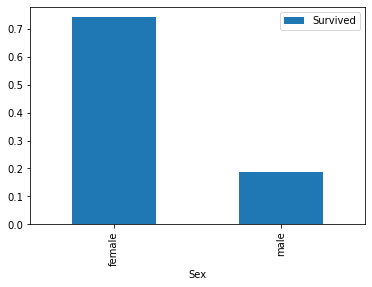

In [7]:
import matplotlib.pyplot as plt
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

Females survived in much higher proportions than males did.

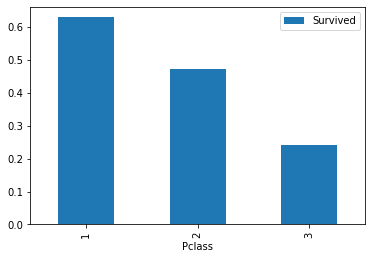

In [8]:
Pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
Pclass_pivot.plot.bar()
plt.show()

## Exploring Age column

In [10]:
print(train["Age"].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


The Age column contains numbers ranging from 0.42 to 80.0. Age is fractional if the passenger is less than one. 
This column has missing values. And since it is a continuous numerical column let us use histograms.

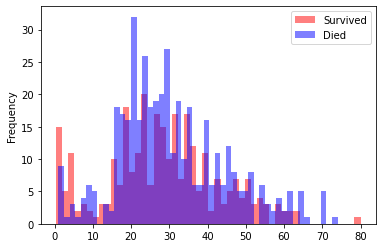

In [11]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple. However, in some age ranges more passengers survived - where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges.

In [12]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

The diagram below shows how the function converts the data.

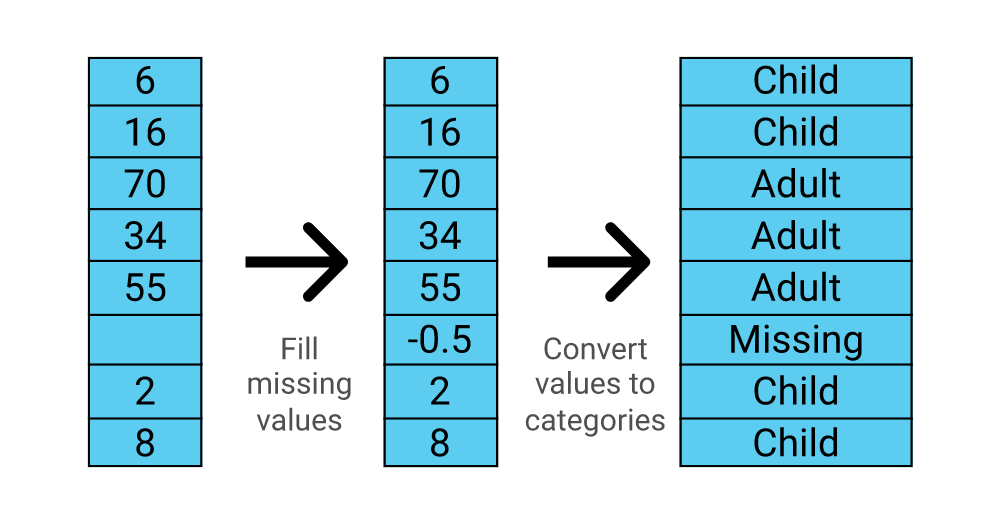

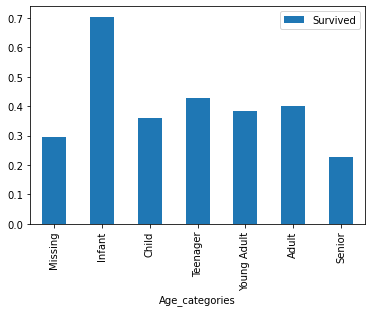

In [13]:
# Create the cut_points and label_names lists to split the Age column into six categories

def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

## Preparing data for ML

We need to prepare the useful columns Sex, Pclass, Age, Age_categories for Machine Learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

In [14]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
"""
function to create the dummy columns for the Pclass column and add it back to the original dataframe. 
It then applies that function to the train and test dataframes.
"""

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,1,0,0,0,0,0,1,0,0


Now that our data has been prepared, we are ready to train our first model. 

## Logistic Regression

Model you will train when performing classification

## The scikit-learn workflow 

consists of four main steps:

- Instantiate (or create) the specific machine learning model you want to use
- Fit the model to the training data
- Use the model to make predictions
- Evaluate the accuracy of the predictions

## Creating ML Model

In [18]:
columns = ['Pclass_1', 
           'Pclass_2', 
           'Pclass_3', 
           'Sex_female', 
           'Sex_male',
           'Age_categories_Missing',
           'Age_categories_Infant',
           'Age_categories_Child', 
           'Age_categories_Teenager',
           'Age_categories_Young Adult', 
           'Age_categories_Adult',
           'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object called lr
lr = LogisticRegression()
# Use LogisticRegression.fit() to fit the model on the train dataset using
# The columns contained in columns as the first (X) parameter
# The Survived column as the second (y) parameter
lr.fit(train[columns], train["Survived"])

LogisticRegression()

Our machine learning model is trained now.

## Splitting our training data

In [19]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 
           'Pclass_2', 
           'Pclass_3', 
           'Sex_female', 
           'Sex_male',
           'Age_categories_Missing',
           'Age_categories_Infant',
           'Age_categories_Child', 
           'Age_categories_Teenager',
           'Age_categories_Young Adult', 
           'Age_categories_Adult',
           'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

- test_size, which lets us control what proportions our data are split into.
- the train_test_split() function randomizes observations before dividing them, and setting a random seed means that our results will be reproducible, which is important if you are collaborating, or need to produce consistent results each time
- overfit meaning it will perform well because we're testing on the same data we've trained on, but then perform much worse on new unseen data.

Now that we have our data split into train and test sets, we can fit our model again on our training set, and then use that model to make predictions on our test set.

Once we have fit our model, we can use the LogisticRegression.predict() method to make predictions.

The predict() method takes a single parameter X, a two dimensional array of features for the observations we wish to predict. X must have the exact same features as the array we used to fit our model. The method returns single dimensional array of predictions.

## Making predictions and measuring their accuracy

In [20]:
from sklearn.metrics import accuracy_score

# Instantiate a new LogisticRegression() object, lr
lr = LogisticRegression()
# Fit the model
lr.fit(train_X, train_y)
# Make predictions
predictions = lr.predict(test_X)
# get accuracy score
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8100558659217877


Our model has an accuracy score of 81.0% when tested against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

## Cross validation

To give us a better understanding of the real performance of our model, we can use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores.

The most common form of cross validation is called k-fold cross validation. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds. In the diagram below, we have illustrated k-fold validation where k is 5.


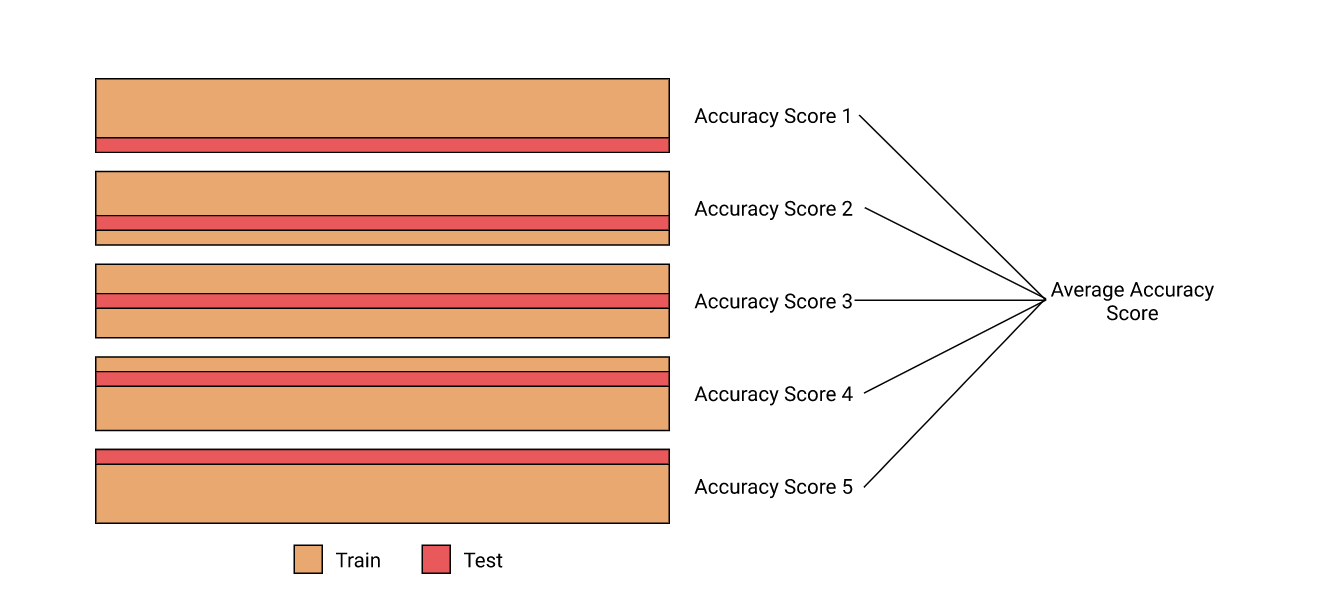

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Instantiate a new LogisticRegression() object, lr
lr = LogisticRegression()
# perform cross-validation on our data
scores = cross_val_score(lr, all_X, all_y, cv=10) # 10 folds
# calculate the mean of scores
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.8        0.82022472 0.76404494 0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80898876]
0.8024719101123596


From the results of our k-fold validation, you can see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%. This demonstrates why cross validation is important. As it happens, our average accuracy score was 80.2%, which is not far from the 81.0% we got from our simple train/test split.

We are now ready to use the model we have built to train our final model and then make predictions on our unseen holdout data, or what Kaggle calls the 'test' data set.

## Make predictions on unseen data 
(Kaggle's test data set)

In [22]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']
lr = LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

#Remember to use holdout[columns] when making predictions as the columns used for fit() and predict() need to be consistent.

In [23]:
holdout_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Now let us create a new dataframe that contains the holdout_predictions and the PassengerId column from the holdout dataframe. 

In [24]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

Finally, we'll use the DataFrame.to_csv() method to save the dataframe to a CSV file. We need to make sure the index parameter is set to False, otherwise we will add an extra column to our CSV.

In [25]:
submission.to_csv("/Users/brindhamanivannan/Desktop/data-projects/datasets/submission.csv",index=False)

The fact that our accuracy on the holdout data is 75.6% compared with the 80.2% accuracy we got with cross-validation indicates that our model is overfitting slightly to our training data.